### 1. Within/Between Class Scatter Matrix

https://www.python-course.eu/linear_discriminant_analysis.php

Given mxn dimensional input X, and expecting 1xn dimensional output y, the Fishers Linear Discriminant Analysis (LDA) searches for the linear projection with weighting vector w (mx1 dimensional, column vector) of X noted as y(X) = wT * X, where the **separability of the classes represented by between class scatter to within class scatter** (SB/SW) is maximized.

***********
We calculate the scatter per class and then sum up all the per_class scatter matrices to receive a measure for the scatter within (**SW**):
$\begin{align}
(1) SW =  \sum_{c \in C}\sum_{j \in N_{c}} (x_j - u_c)(x_j - u_c)^T\\
\end{align}$

We calculate the scatter within class and then sum up all the per_class scatter matrices to receive a measure for the scatter between (**SB**). The process is equilevant to calculate the scatter of the class means with reference to the global mean, and further weighted-sum the scatters by number of samples. We can see that u be changed to other statistical meanings, e.g median. This only changes the SB:

$\begin{align}
(2) SB =  \sum_{c \in C} N_c (u_c - u)(u_c - u)^T\\
\end{align}$

Note that, if we take the scatter matrix of X as ST, then ST = SW + SB:
$\begin{align}
(3) ST &=  \sum_{x \in X} (x - u)(x - u)^T  \\
&=  \sum_{c \in C}\sum_{ j \in N_c} [(x_j - u_c) + (u_c - u)][(x_j - u_c) + (u_c - u)]^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T + \sum_{c \in C}\sum_{ j \in N_c} (u_c - u)(u_c - u)^T + \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(u_c - u)^T + \sum_{c \in C}\sum_{ j \in N_c} (u_c - u)(x_j - u_c)^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T +\sum_{c \in C}(\sum_{ j \in N_c} x_j - N_c * u_c)(u_c - u)^T + \sum_{c \in C}(u_c - u) (\sum_{ j \in N_c}x_j - N_c * u_c)^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T + \sum_{c}(0)(u_x - u)^T + \sum_{c}(u_x - u)(0) \\ 
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T + 0 + 0 \\
&=  SW + SB +0 +0 \\
&=  SW + SB
\end{align}$

(Very interesting indeed, SB and SW are all scatter matrix, covariance matrix and PSD matirx. SB has a higher level meaning concerning each sample and global mean, and SW has a lower level meaning concerning each sample and its class mean. The distribution of Uc has about 1/Nc the standard deviation of the distribution of X.)

***********

So the trade off between SW and SB, is essentially trading off two components in ST. ST is similar to variance or energy. So this trade-off is to maximize the 'good' variance (center separatability), and minimize the 'bad' variance (intra-class variance). 

### 2. Why using SW/SB
**********************
Consider the classification as **least square regresssion problem**, the regression loss can be modeled as:

$\begin{align}
Loss_w &= \sum_{c\in C} SE_c\\
    & =  \sum_{c\in C} \sum_{j\in N_c} [y({x_j}) - y({u_c})]^2 \\
    & =  \sum_{c\in C} \sum_{j\in N_c} (w^T * x_j - w^T * u_c)(w^T * x_j - w^T * u_c)^T\\
    & =  \sum_{c\in C} \sum_{j\in N_c}  w^T*(x_j - u_c)(x_j - u_c)^T * w\\
    & =  \sum_{c\in C}w^T * [\sum_{j\in N_c} (x_j - u_c)(x_j - u_c)^T] * w\\
    & =  w^T * \sum_{c\in C}Cov(X_c) * w\\
    & =  w^T * SW * w    
\end{align}$

This loss represents how much the predictions deviate from the labels, across all samples. The smaller the Loss_w, the better the fitting, in general.

**********************

The scatter between classes a, b can be expressed as square error between two class means:

$\begin{align}
SE_{a,b \in C} & =  N_{a} * N_{b} * [(y(u_{a}) - y(u_{b})]^2 \\
& =    N_a * N_b * (w^T * u_a - w^T * u_b)(w^T * u_ia - w^T * u_b)^T\\
& =    N_a * N_b * w^T*[(u_a - u_b)(u_a - u_b)^T] * w\\
\end{align}$

When summing up all pairs, the overal becomes:

$\begin{align}
Loss_b &= \sum SE_{a,b}^{a \neq b}\\
       &= w^T*\sum_{}^{a \neq b} N_a * N_b * [(u_a - u_b)(u_a - u_b)^T] * w\\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u + u - u_b)^T] * w \\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w  + w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u - u_b)^T] * w \\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w  + w^T*\sum_{b,a}^{b \neq a}  N_b *N_a * [(u_b - u_a)(u_b - u)^T] * w \\
       &= 2 * w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w \\
       &= 2 * w^T*\sum_{a}N_a*\sum_{b \neq a} N_b * [(u_a - u_b)(u_a - u)^T * w \\
       &= 2 * w^T*\sum_{a}N_a*[\sum_{b \neq a} N_b * u_a - \sum_{b \neq a} N_b * u_b)]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N_a*[(N - N_a) * u_a - (N*u - N_a*u_a)]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N_a*[(N * u_a - N*u]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N * N_a*[(u_a - u]*(u_a - u)^T * w \\
       &= 2 * N * w^T*\sum_{c}N_c*[(u_c - u]*(u_c - u)^T * w \\
       &= 2 * N * w^T* SB * w \\       
\end{align}$
 

Clearly, SB determines the loss which govens the separatability of the classes.

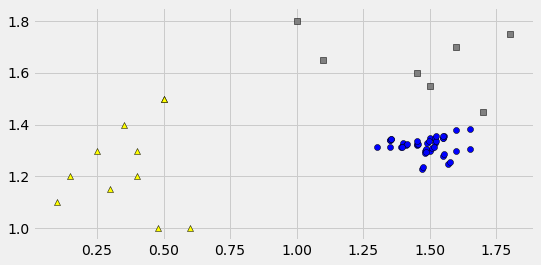

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)


# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles  = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles    = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

#Plot the data
fig = plt.figure(figsize=(8,4))
ax0 = fig.add_subplot(111)
ax0.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')
plt.show()

# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles  = np.mean(triangles,axis=1).reshape(2,1)
mean_circles    = np.mean(circles,axis=1).reshape(2,1)

In [2]:
# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up
scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)
scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles + scatter_circles + scatter_rectangles

print('@Scatter Matrix Within Class:\n', SW)

@Scatter Matrix Within Class:
 [[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


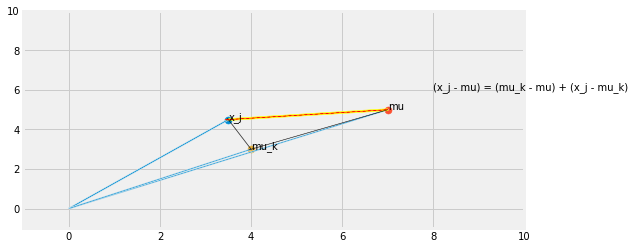

In [3]:
x_j = np.array([3.5,4.5])
mu  = np.array([7,5])
mu_k = np.array([4,3])

fig = plt.figure(figsize=(8,4))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)

for i in [x_j,mu,mu_k]:
    ax0.scatter(i[0],i[1],s=50)
ax0.annotate('x_j',x_j)
ax0.annotate('mu',mu)
ax0.annotate('mu_k',mu_k)
ax0.annotate('(x_j - mu) = (mu_k - mu) + (x_j - mu_k)',np.array(mu)+np.array([1,1]))

# Draw the position vectors 
for i in [x_j,mu,mu_k]:
    ax0.arrow(0,0,i[0],i[1],head_width=0.01,width=0.05)
    
# Draw the vectors
ax0.arrow(mu[0],mu[1],(x_j-mu)[0],(x_j-mu)[1],head_width=0.05,width=0.1,color='yellow') # xj_minus_mu
ax0.arrow(mu[0],mu[1],(mu_k-mu)[0],(mu_k-mu)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # mu_k_minus_mu
ax0.arrow(mu_k[0],mu_k[1],(x_j-mu_k)[0],(x_j-mu_k)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # xj_minus_mu_k

# If we now add up the vectors (mu_k-mu) and (x_j-mu_k) wee see that this vector alligns with the vector (x_k-mu)
mu_k_minus_mu = mu_k-mu
x_j_minus_mu_k = x_j-mu_k
res = (mu_k-mu)+(x_j-mu_k)
ax0.arrow(mu[0],mu[1],res[0],res[1],head_width=0.05,width=0.01,linestyle='-.',color='red')
plt.show()